Part 1 - Implementation

In [1]:
import numpy as np

In [2]:
# Model Parameters
input_size = 3 # no. of features
layers = [4,3] # no. of neurons in 1st and 2nd layer
output_size = 2

In [3]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [4]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)

        model = {}

        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model
        self.activation_outputs = None

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = np.tanh(z3)

        self.activation_outputs = (a1,a2,y_)
        return y_

    def backward(self, x, y, learning_rate=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]

        a1, a2, y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)

        delta2 = (1 - np.square(a2)) * np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)

        delta1 = (1 - np.square(a1)) * np.dot(delta2, W2.T)  
        dw1 = np.dot(X.T, delta1)  
        db1 = np.sum(delta1, axis=0) 

        # Update the model Parameters using GD
        self.model["W1"] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1

        self.model["W2"] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2

        self.model["W3"] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1", W1.shape)
        print("A1",a1.shape)

        print("W2", W2.shape)
        print("A2",a2.shape)

        print("W3", W3.shape)
        print("Y_",y_.shape)

In [5]:
# def loss(y_oht,p):
#     l = -np.mean(y_oht*np.log(p))
#     return l

def loss(y_oht, p, epsilon=1e-10):
    p = np.clip(p, epsilon, 1 - epsilon)  # Clip p to avoid taking log of 0 or 1
    l = -np.mean(y_oht * np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
     

In [6]:
# xyz = np.zeros((m,depth))
# xyz[np.arange(m),y] = 1

Generating Data

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

print(X.shape)
print(Y.shape)

(500, 2)
(500,)


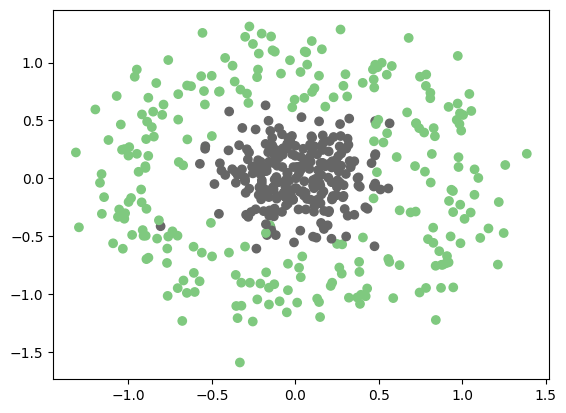

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

Training Our Model

In [9]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [10]:
model.forward(X)

array([[-0.37048793, -0.44821314],
       [-0.4112583 , -0.51024516],
       [-0.24374042, -0.50821652],
       [-0.11811192,  0.66784918],
       [-0.31627948, -0.7151039 ],
       [-0.41119434, -0.43876301],
       [-0.23039535,  0.27165819],
       [-0.50205862, -0.65767615],
       [-0.30210956, -0.53588503],
       [ 0.4761999 ,  0.82182958],
       [-0.39832258, -0.38131028],
       [ 0.14512981,  0.39128213],
       [ 0.45624974,  0.78120722],
       [-0.15574441,  0.33560185],
       [-0.38484343, -0.42885154],
       [-0.14858652,  0.24492789],
       [-0.18434665, -0.07805502],
       [ 0.12852433, -0.29672528],
       [ 0.58158597,  0.69525668],
       [ 0.47535323,  0.64053456],
       [-0.43032695, -0.39559911],
       [-0.41186014, -0.57762739],
       [ 0.39191127,  0.05279853],
       [-0.03724197, -0.55890987],
       [-0.10874818,  0.0816006 ],
       [ 0.41600157,  0.17931822],
       [-0.47597742, -0.6405306 ],
       [ 0.42146726,  0.50012217],
       [ 0.090494  ,

In [11]:
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_ (500, 2)


In [12]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []

    classes = 2
    Y_OHT = one_hot(Y,classes)

    for ix in range(epochs):

        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)

        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
    return training_loss

In [13]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 6.0930
Epoch 1 Loss 2.0733
Epoch 2 Loss 1.8897
Epoch 3 Loss 0.7626
Epoch 4 Loss 0.1199
Epoch 5 Loss 0.1996
Epoch 6 Loss 0.1675
Epoch 7 Loss 0.1911
Epoch 8 Loss 0.1622
Epoch 9 Loss 0.1598
Epoch 10 Loss 0.1518
Epoch 11 Loss 0.1472
Epoch 12 Loss 0.1412
Epoch 13 Loss 0.1363
Epoch 14 Loss 0.1310
Epoch 15 Loss 0.1263
Epoch 16 Loss 0.1216
Epoch 17 Loss 0.1173
Epoch 18 Loss 0.1130
Epoch 19 Loss 0.1091
Epoch 20 Loss 0.1053
Epoch 21 Loss 0.1017
Epoch 22 Loss 0.0983
Epoch 23 Loss 0.0952
Epoch 24 Loss 0.0922
Epoch 25 Loss 0.0894
Epoch 26 Loss 0.0867
Epoch 27 Loss 0.0843
Epoch 28 Loss 0.0819
Epoch 29 Loss 0.0798
Epoch 30 Loss 0.0777
Epoch 31 Loss 0.0758
Epoch 32 Loss 0.0740
Epoch 33 Loss 0.0724
Epoch 34 Loss 0.0708
Epoch 35 Loss 0.0693
Epoch 36 Loss 0.0679
Epoch 37 Loss 0.0666
Epoch 38 Loss 0.0654
Epoch 39 Loss 0.0643
Epoch 40 Loss 0.0632
Epoch 41 Loss 0.0622
Epoch 42 Loss 0.0612
Epoch 43 Loss 0.0603
Epoch 44 Loss 0.0595
Epoch 45 Loss 0.0587
Epoch 46 Loss 0.0580
Epoch 47 Loss 0.0572
Ep

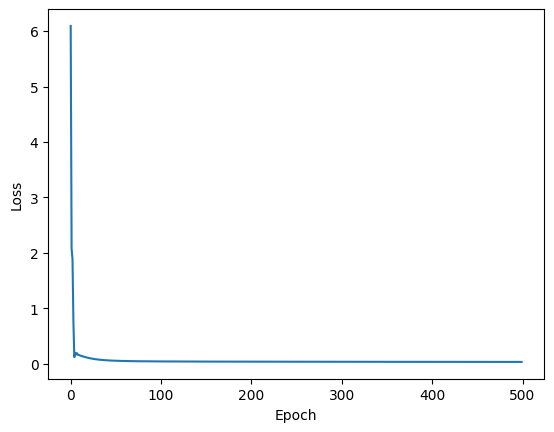

In [14]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Find Accuracy

In [15]:
from visualize import plot_decision_boundary

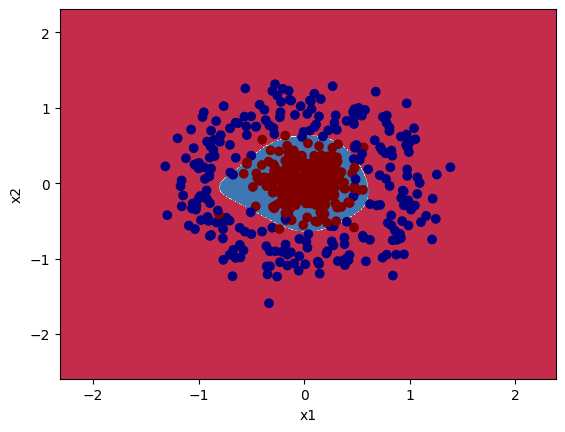

In [16]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [17]:
outputs = model.predict(X)

In [18]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.2f"%(training_accuracy*100))

Training Accuracy 97.20


Trying with new dataset

In [19]:
# XOR Dataset
X = np.array([[0,0],[1,0],[0,1],[1,1]])
Y = np.array([0,1,1,0])

In [20]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 8.6384
Epoch 1 Loss 8.6384
Epoch 2 Loss 8.6385
Epoch 3 Loss 6.4199
Epoch 4 Loss 4.0148
Epoch 5 Loss 3.7931
Epoch 6 Loss 3.6847
Epoch 7 Loss 3.6112
Epoch 8 Loss 3.5555
Epoch 9 Loss 3.5107
Epoch 10 Loss 3.4732
Epoch 11 Loss 3.4411
Epoch 12 Loss 3.4131
Epoch 13 Loss 3.3882
Epoch 14 Loss 3.3659
Epoch 15 Loss 3.3458
Epoch 16 Loss 3.3274
Epoch 17 Loss 3.3105
Epoch 18 Loss 3.2949
Epoch 19 Loss 3.2804
Epoch 20 Loss 3.2669
Epoch 21 Loss 3.2543
Epoch 22 Loss 3.2424
Epoch 23 Loss 3.2313
Epoch 24 Loss 3.2208
Epoch 25 Loss 3.2108
Epoch 26 Loss 3.2014
Epoch 27 Loss 3.1924
Epoch 28 Loss 3.1839
Epoch 29 Loss 3.1757
Epoch 30 Loss 3.1679
Epoch 31 Loss 3.1605
Epoch 32 Loss 3.1534
Epoch 33 Loss 3.1465
Epoch 34 Loss 3.1400
Epoch 35 Loss 3.1336
Epoch 36 Loss 3.1276
Epoch 37 Loss 3.1217
Epoch 38 Loss 3.1161
Epoch 39 Loss 3.1106
Epoch 40 Loss 3.1054
Epoch 41 Loss 3.1003
Epoch 42 Loss 3.0953
Epoch 43 Loss 3.0906
Epoch 44 Loss 3.0859
Epoch 45 Loss 3.0814
Epoch 46 Loss 3.0771
Epoch 47 Loss 3.0729
Ep

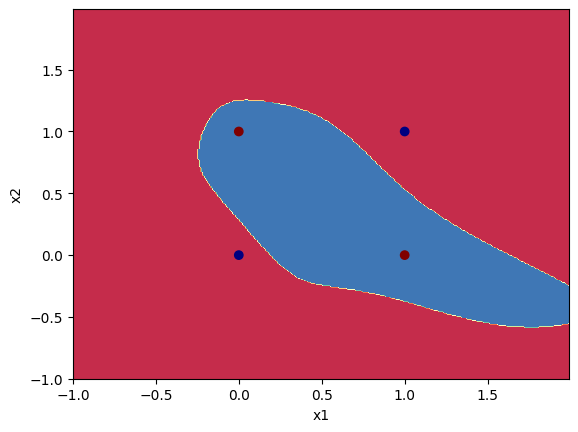

In [21]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [22]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.2f"%(training_accuracy*100))

Training Accuracy 100.00


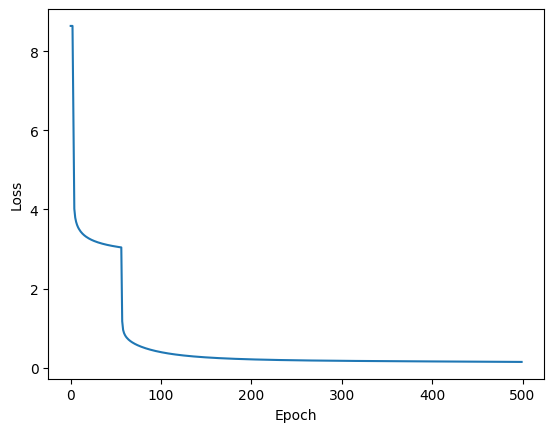

In [23]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [24]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [25]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 1.0000


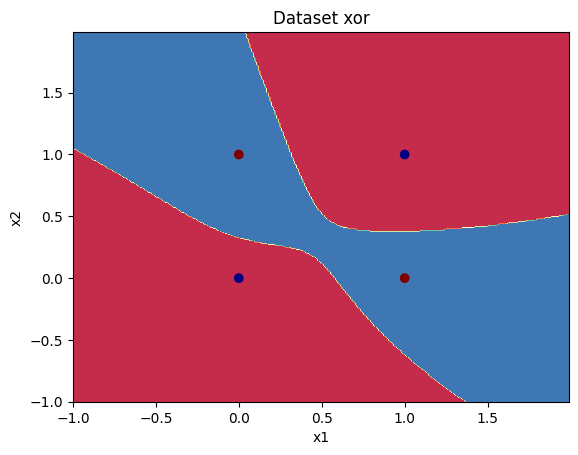

Training Acc 0.9600


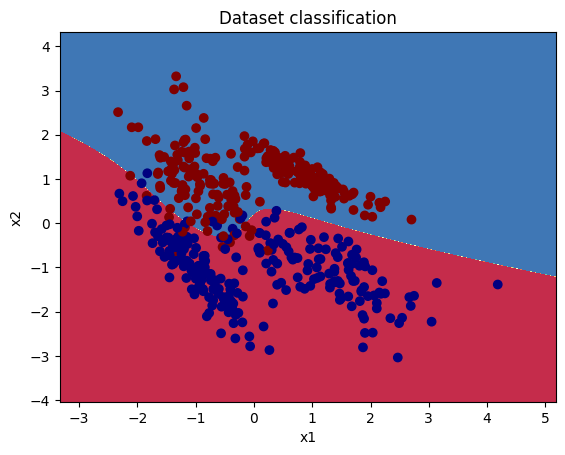

Training Acc 0.9740


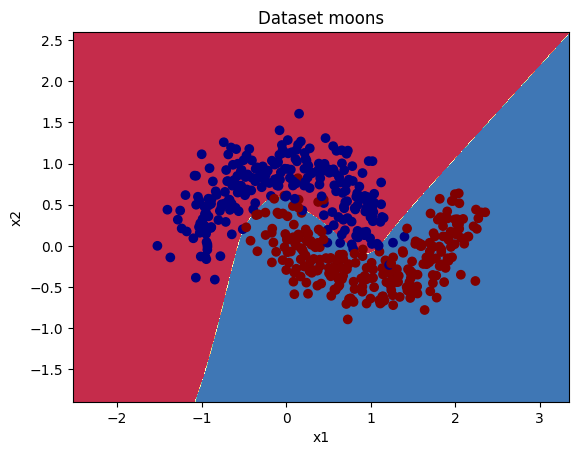

Training Acc 0.9700


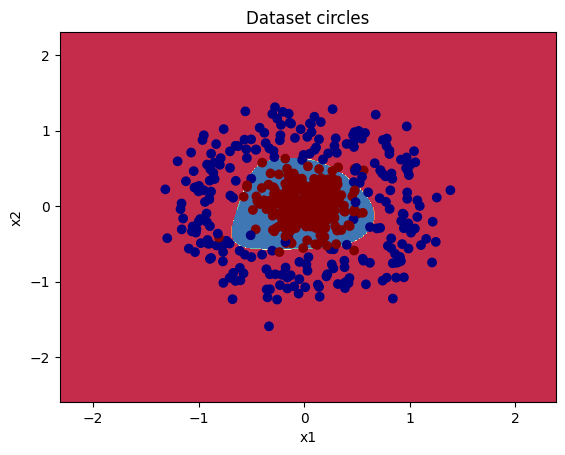

In [26]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()
    
    